In [1]:
import dd
import numpy as np
import matplotlib.pyplot as plt
from paperlib import pedshtf as pedshtf
from scipy.optimize import curve_fit
from sklearn.isotonic import IsotonicRegression
from rpsavgperf import rpsavgperf
from ipfnpytools.isotonic_regression import isotonic_regression
from paperlib import binMeanDataYY as binMeanDataYY
#
plt.style.use('helvet2')

## Read the data
# Attention: Editions 3 and 4 are chronologically switched!!!
### P1: Edition 1 t=[2.15, 2.35]s 
### P2: Edition 2 t=[3.7, 3.9]s
### P4: Edition 3 t=[5.4, 5.6]s
### P3: Edition 4 t=[4.7, 4.9]s
### P5: Edition 5 t=[6.9, 7.1]s

In [2]:
shotnr = 30733
p1 = pedshtf(shotnr=shotnr, exper='guimas', edition=1, nr_diags=4, elm_exper='AUGD')
p2 = pedshtf(shotnr=shotnr, exper='guimas', edition=2, nr_diags=4, elm_exper='AUGD')
p3 = pedshtf(shotnr=shotnr, exper='guimas', edition=4, nr_diags=4, elm_exper='AUGD')
p4 = pedshtf(shotnr=shotnr, exper='guimas', edition=3, nr_diags=4, elm_exper='AUGD')
p5 = pedshtf(shotnr=shotnr, exper='guimas', edition=5, nr_diags=4, elm_exper='AUGD')
pall = [p1, p2, p3, p4, p5]

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)
/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)
/afs/ipp/aug/ads-diags/common/python/lib/dd_20180216.py:117: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


#### Shifts

In [3]:
for p in pall:
    print(p.neRshift)

[ 0.     0.     0.     0.006 -0.004  0.     0.065  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.   ]
[ 0.     0.     0.     0.006 -0.004  0.     0.065  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.   ]
[ 0.     0.     0.     0.006 -0.004  0.     0.065  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.   ]
[ 0.     0.     0.     0.006 -0.004  0.     0.065  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.   ]
[ 0.     0.     0.     0.006 -0.004  0.     0.065  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0

In [6]:
for p in pall:
    print(p.t1,p.t2)

(array([2.15], dtype=float32), array([2.35], dtype=float32))
(array([3.7], dtype=float32), array([3.9], dtype=float32))
(array([4.7], dtype=float32), array([4.9], dtype=float32))
(array([5.4], dtype=float32), array([5.6], dtype=float32))
(array([6.9], dtype=float32), array([7.1], dtype=float32))


#### Various settings

In [46]:
cutsl_low = [2.135, 2.135, 2.135, 2.135, 2.135]
cutsl_hi = [3.0, 3.0, 3.0, 3.0, 3.0]
cutsh_low = [2.12, 2.12, 2.12, 2.12, 2.12]
cutsh_hi = [3.0, 3.0, 3.0, 3.0, 3.0]
reflfsshift = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
refhfsshift = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
#Indexes
l_indstart = [0,0,0,0,0]
l_indend = [-1,-6,-6,-3,-2]
h_indstart = [0,0,0,0,0]
h_indend = [-1,-1,-1,-1,-10]

dotsizeref = 6
labels = [r'$\mathrm{TS_{edge}}$', 'LIN', 'Ref. LFS', 'Ref. HFS']

### Average binned and Isotonic regression

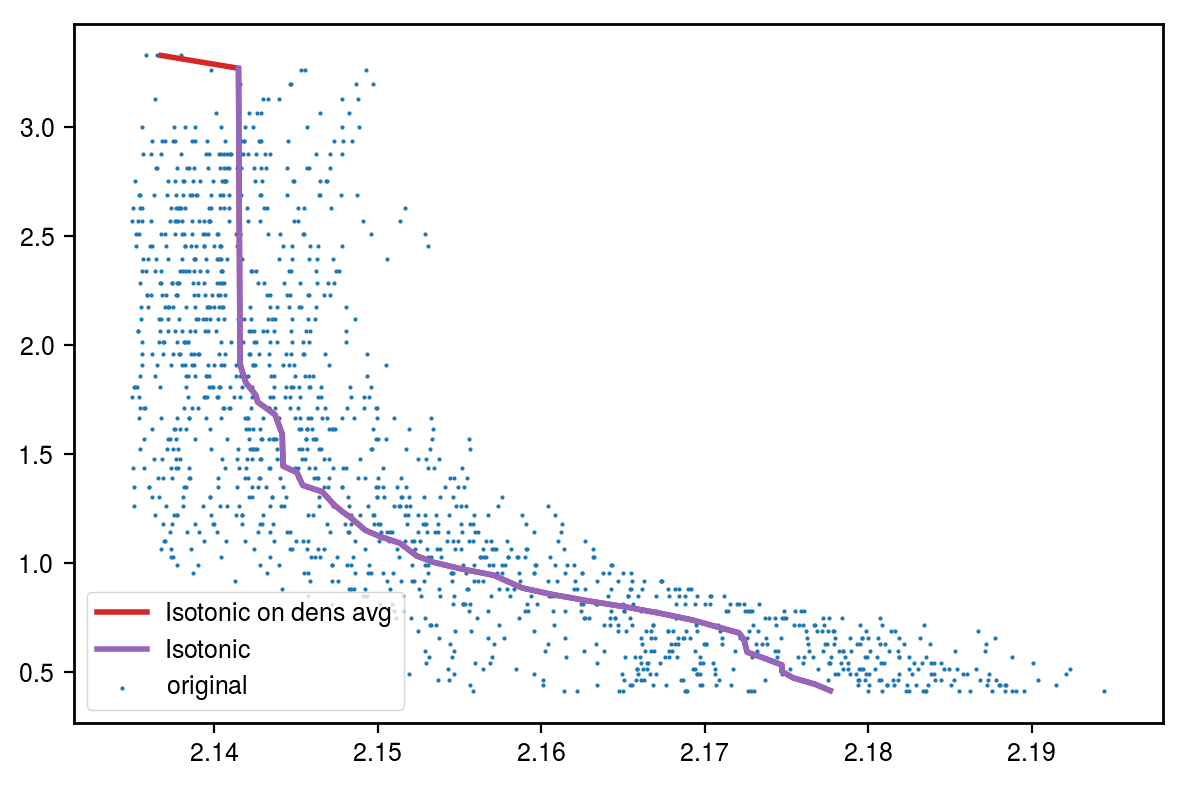

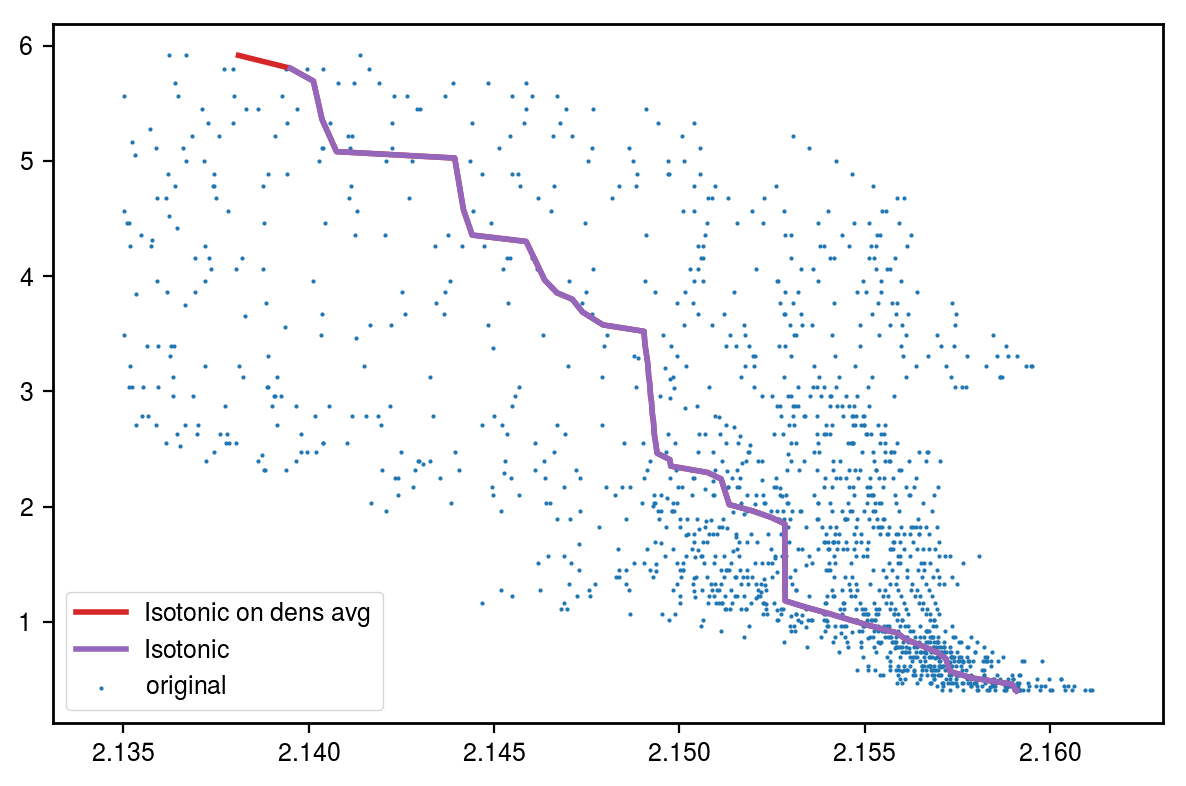

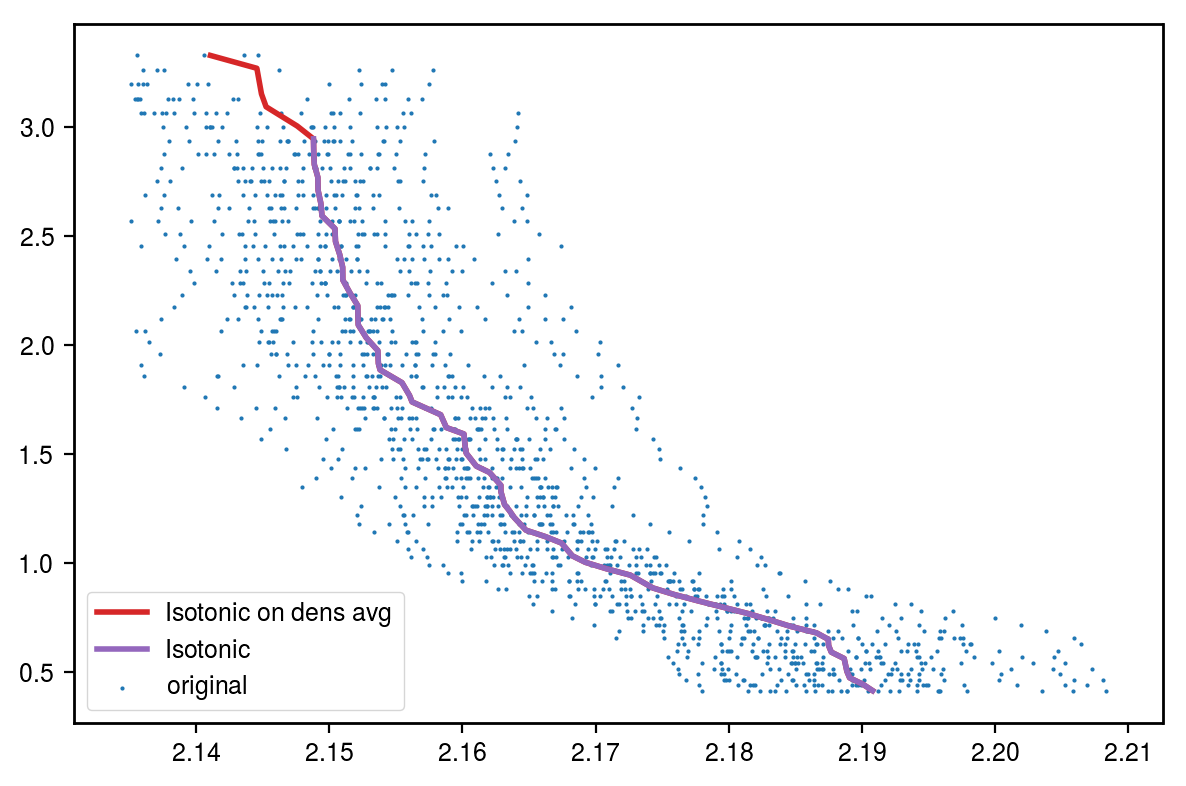

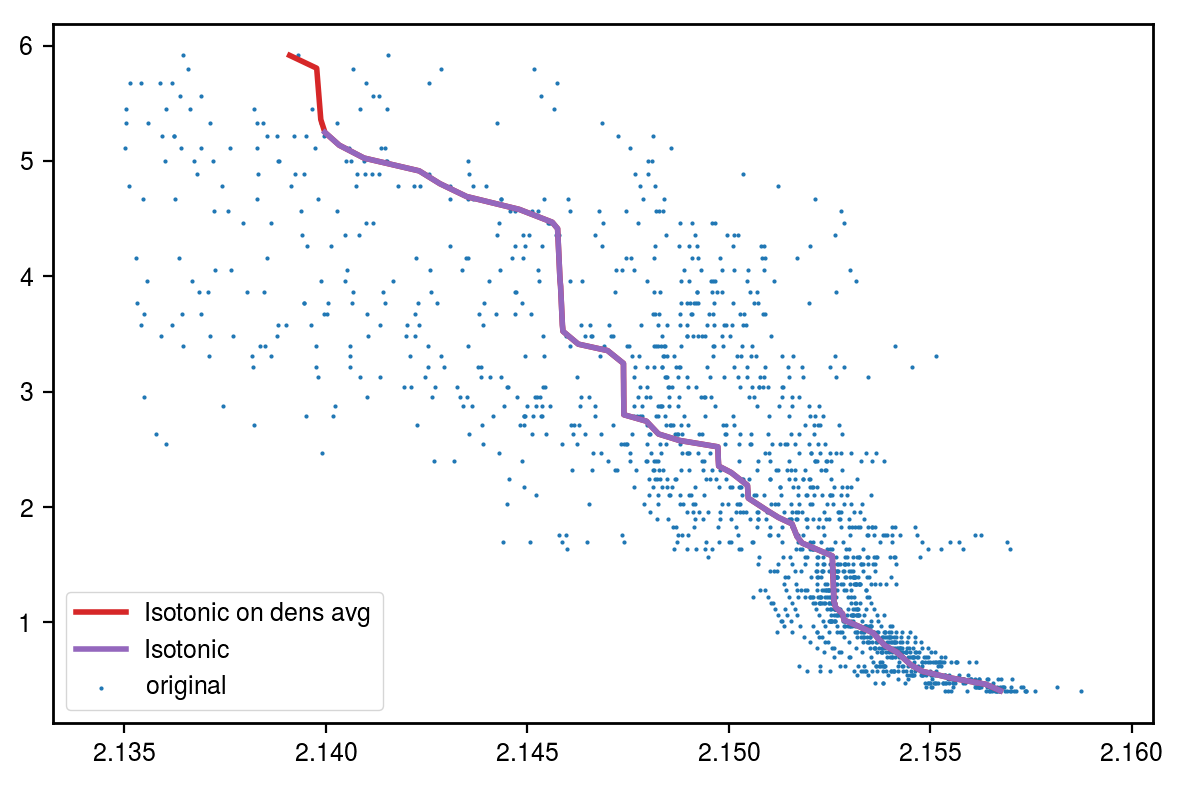

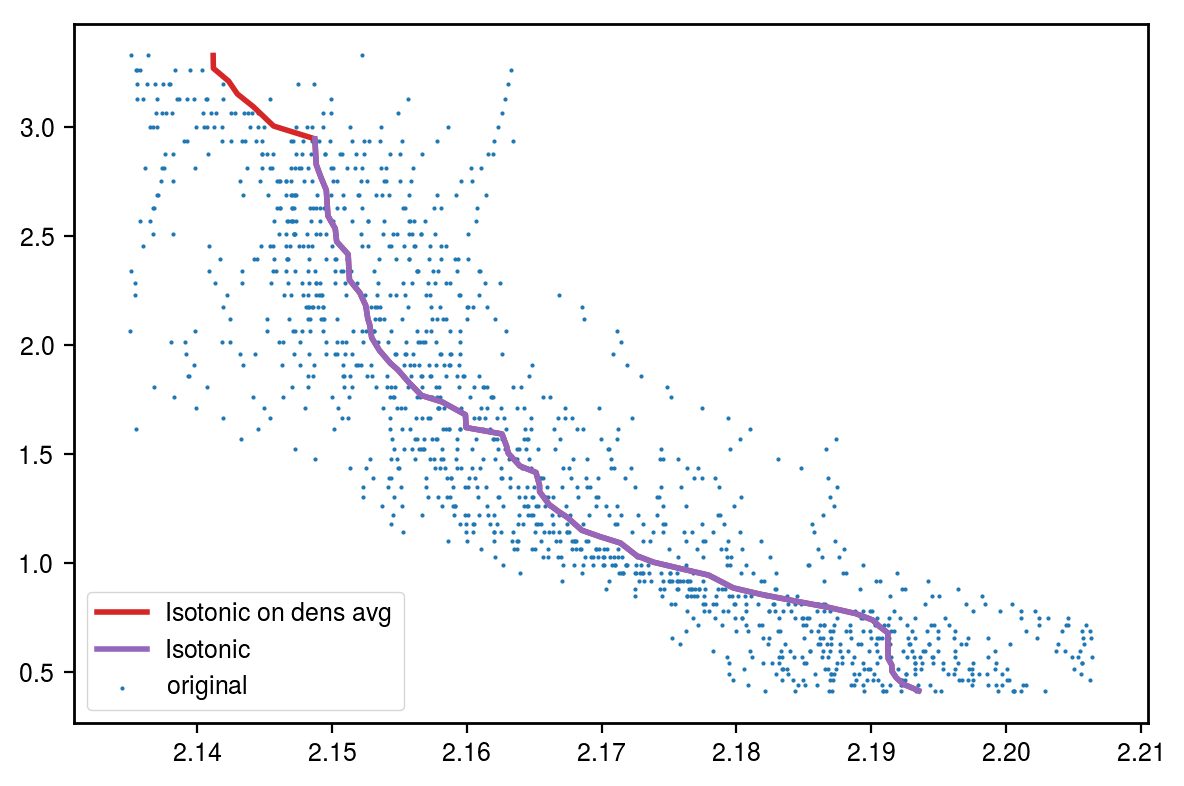

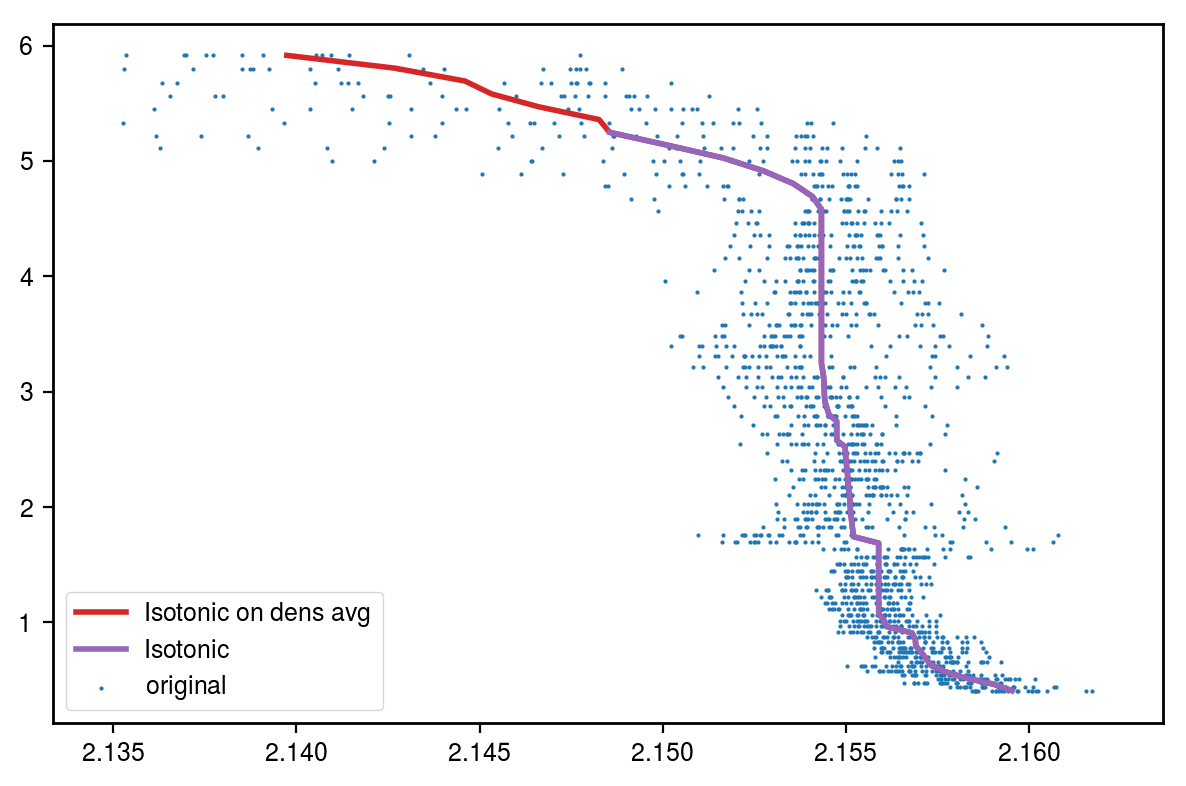

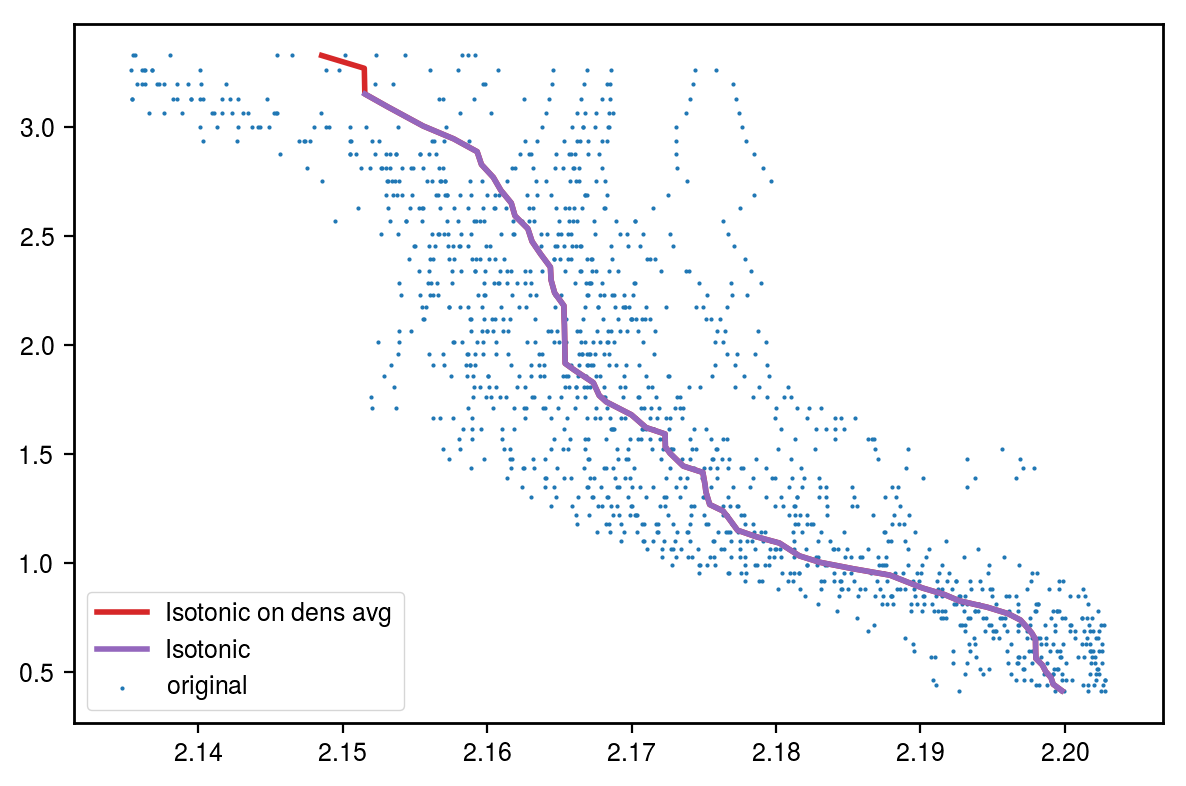

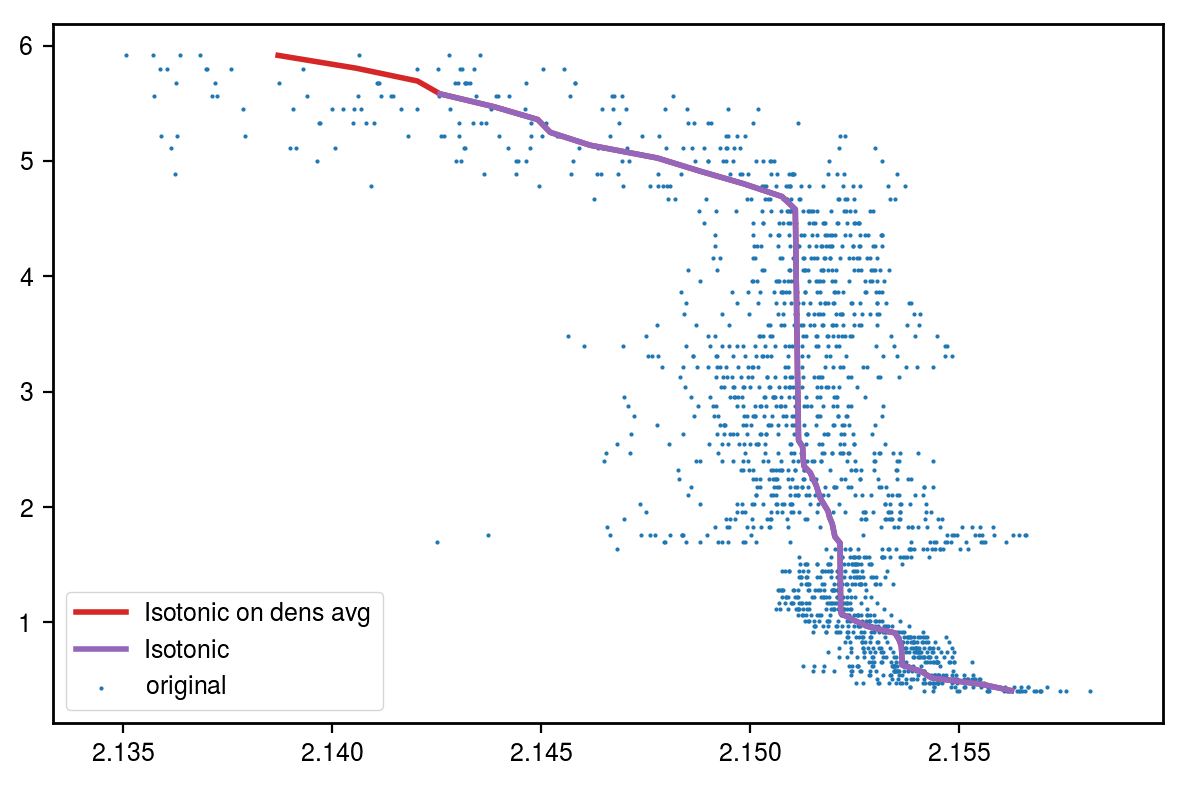

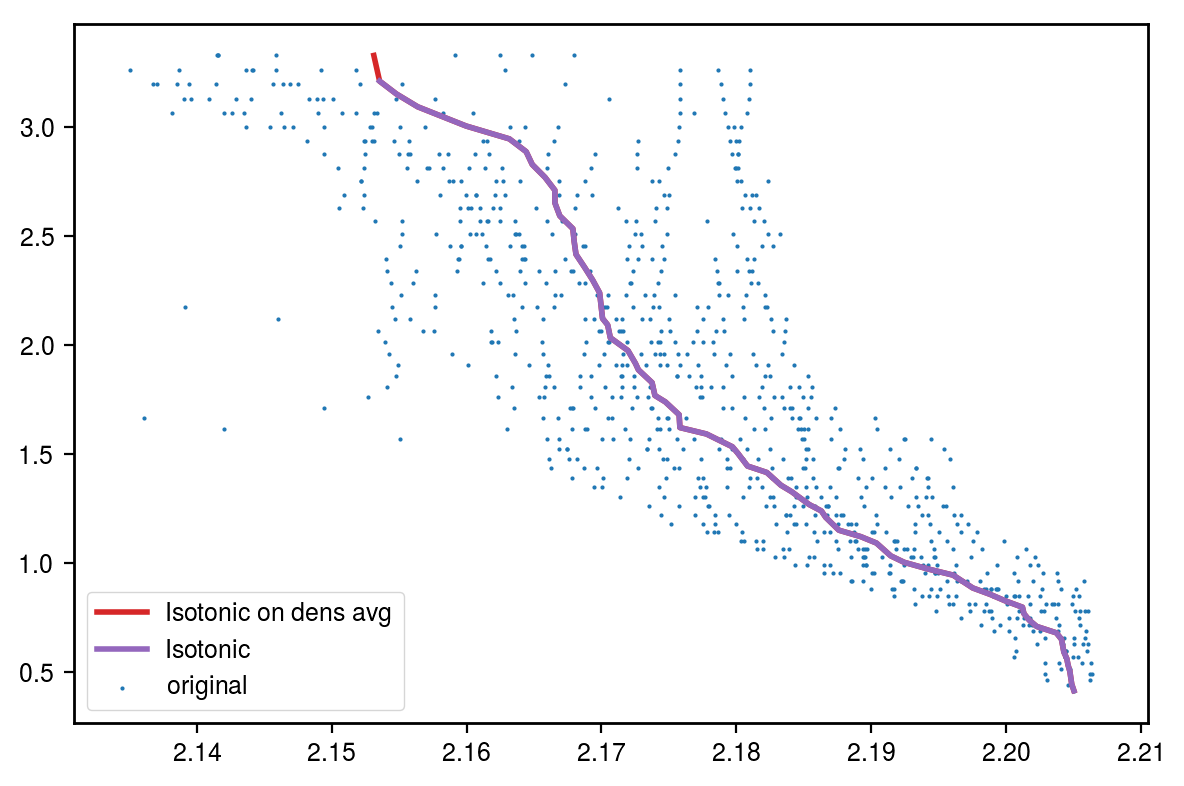

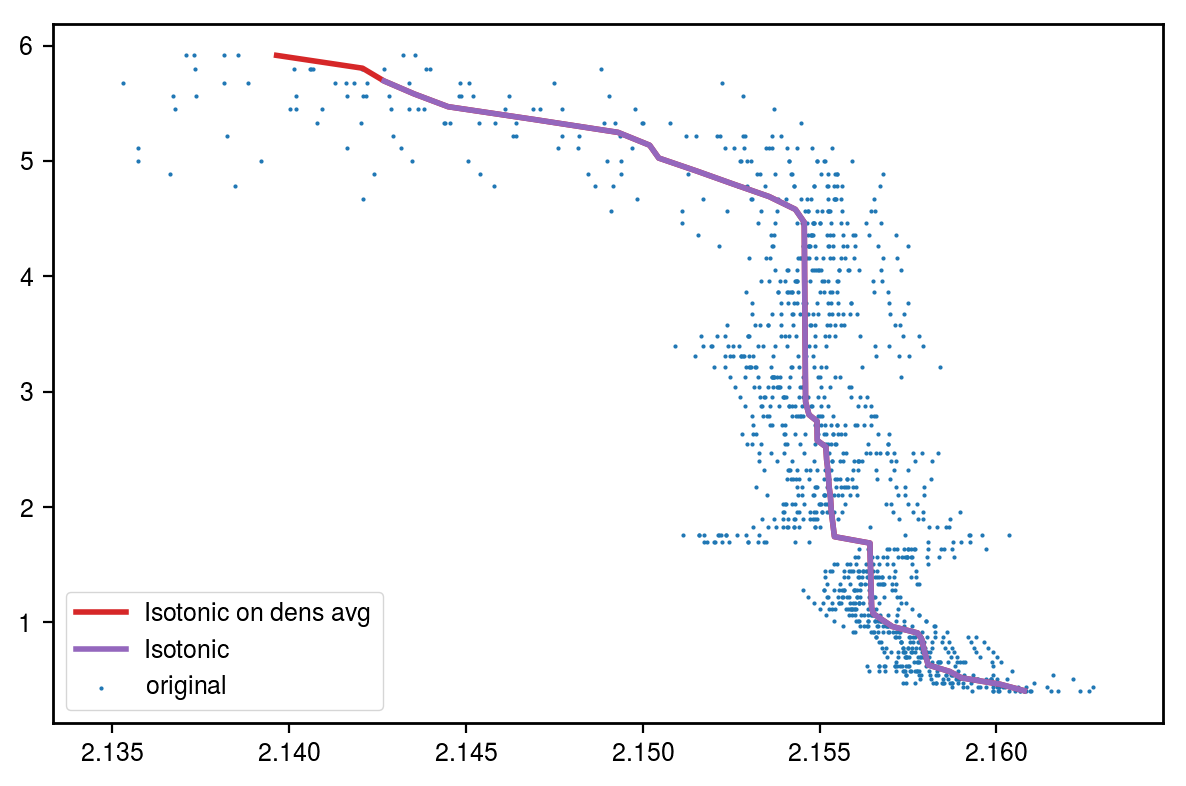

In [78]:
timeind = 4
diagind = 3
for timeind in range(5):
    for diagind in range(2,4):
        lrad = pall[timeind].rad[pall[timeind].indi[diagind]:pall[timeind].indf[diagind]]
        lrho = pall[timeind].rhos[pall[timeind].indi[diagind]:pall[timeind].indf[diagind]]
        ldens = pall[timeind].dens[pall[timeind].indi[diagind]:pall[timeind].indf[diagind]]*1e-19
        lms = (lrad>cutsl_low[timeind])&(lrad<cutsl_hi[timeind])

        isoall = isotonic_regression(lrad[lms], strict=True)

        r, n = binMeanDataYY(lrad[lms], ldens[lms])
        riso = isotonic_regression(r, strict=True)

        plt.figure(dpi=200)
        plt.scatter(lrad[lms], ldens[lms], label='original',s=1)
        #plt.plot(r, n,lw=10,c='C1', label='Binned dens avg')
        isone = ldens[lms]
        #plt.plot(isoall[l_indstart[timeind]:l_indend[timeind]], isone[l_indstart[timeind]:l_indend[timeind]], color='C2', label='iso')
        plt.plot(riso, n, lw=2,c='C3', label='Isotonic on dens avg')
        plt.plot(riso[l_indstart[timeind]:l_indend[timeind]], n[l_indstart[timeind]:l_indend[timeind]], lw=2,c='C4', label='Isotonic')
        plt.legend(loc='lower left')
        fname = './SupportFiles/prof_'+str(timeind)+'_'+str(diagind)+'.30733'
        np.savetxt(fname, np.c_[riso[l_indstart[timeind]:l_indend[timeind]], n[l_indstart[timeind]:l_indend[timeind]]])
        plt.tight_layout()
        plt.show()

In [52]:
range(2,4)

[2, 3]

# Attempt to plot all at once

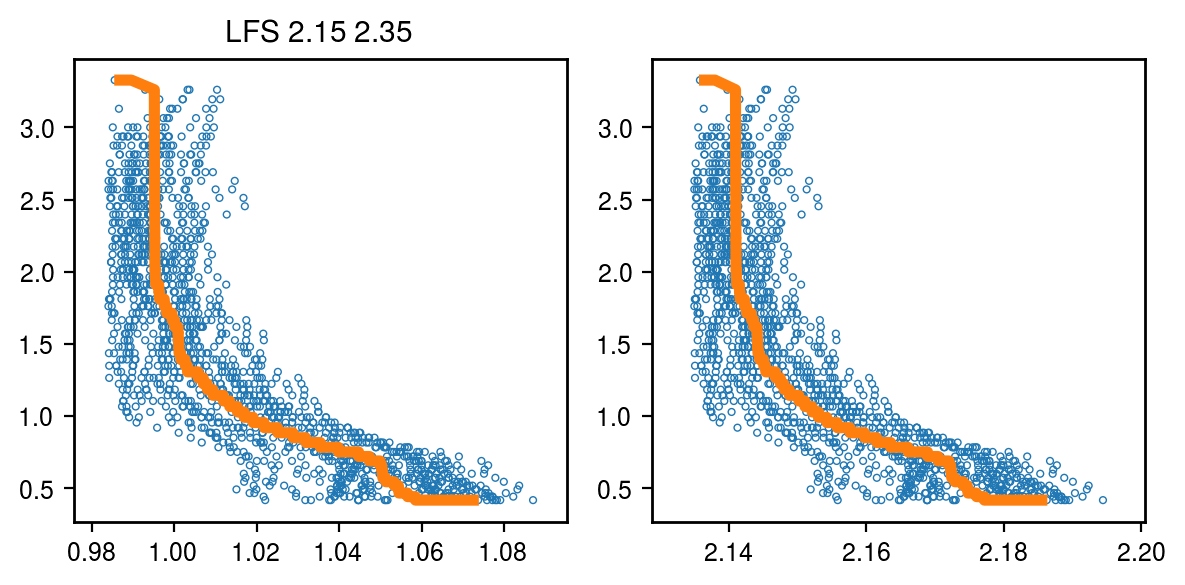

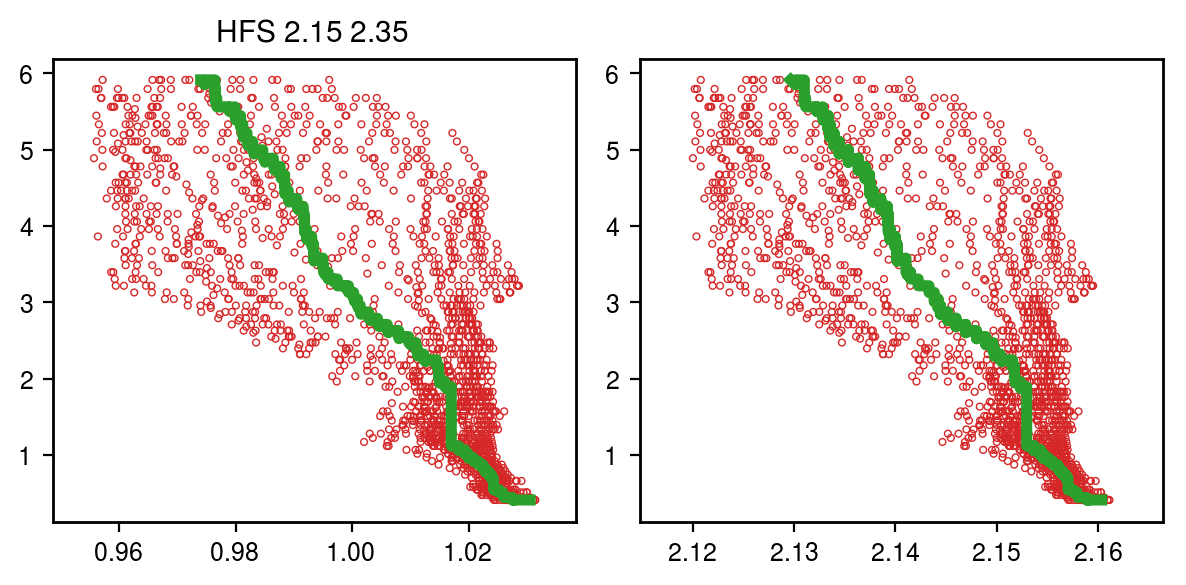

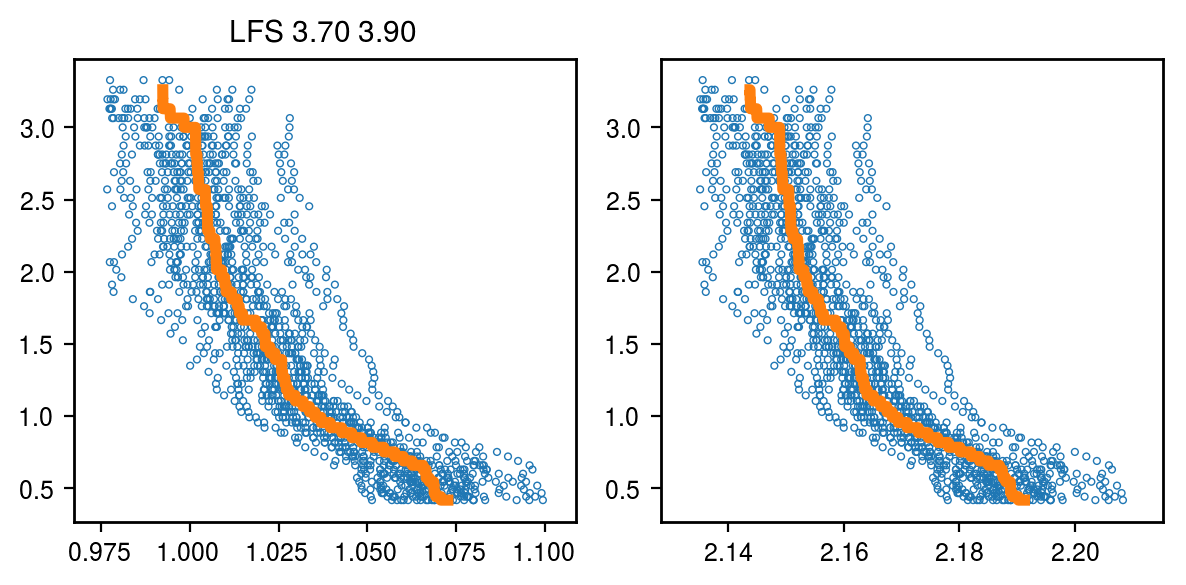

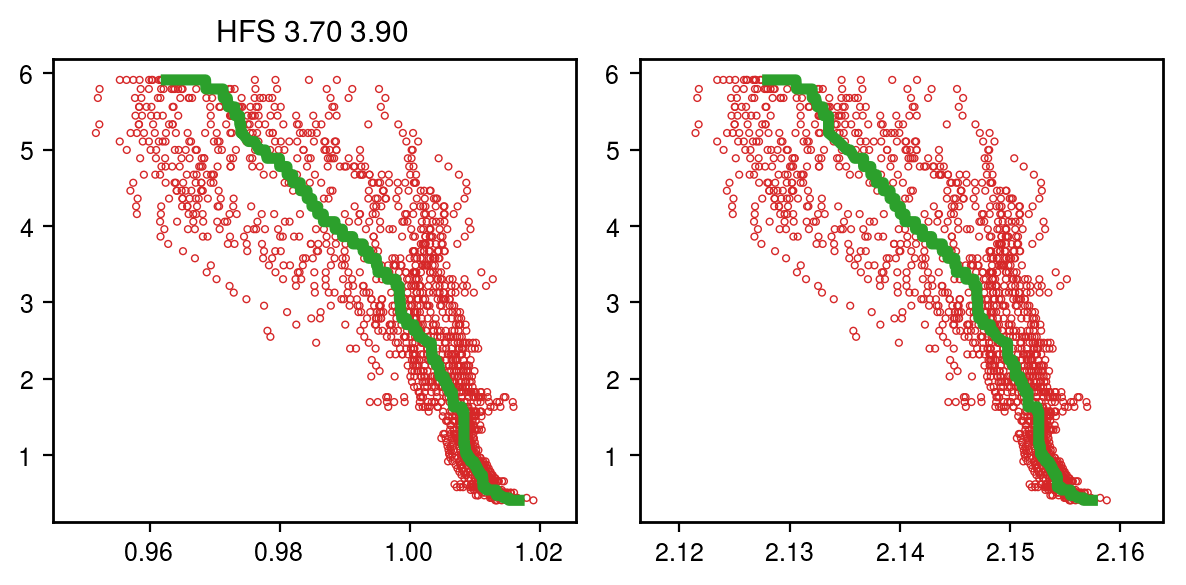

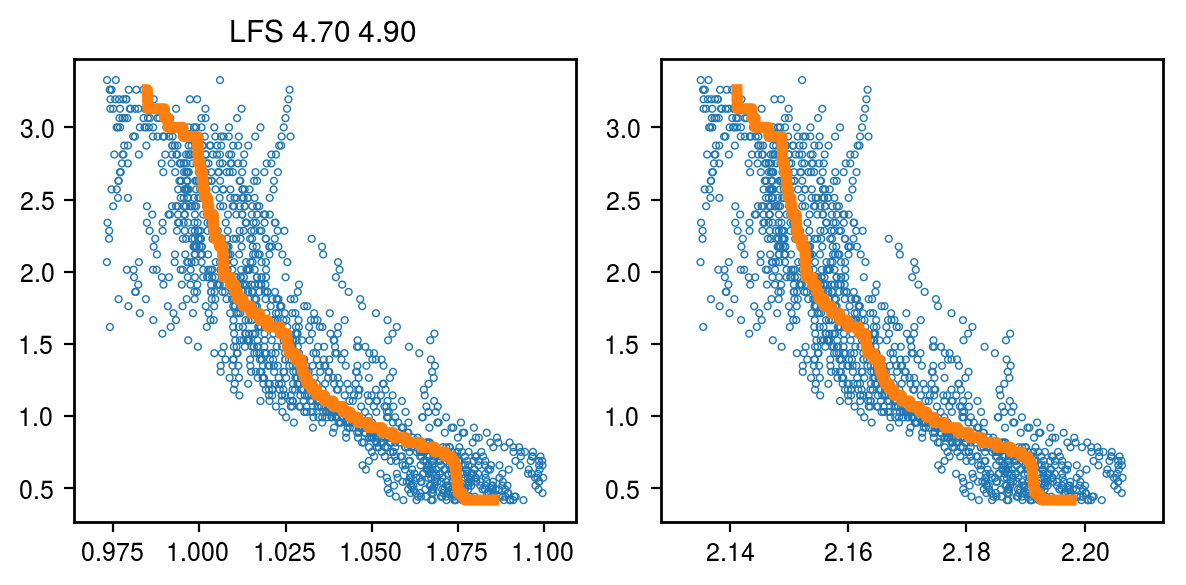

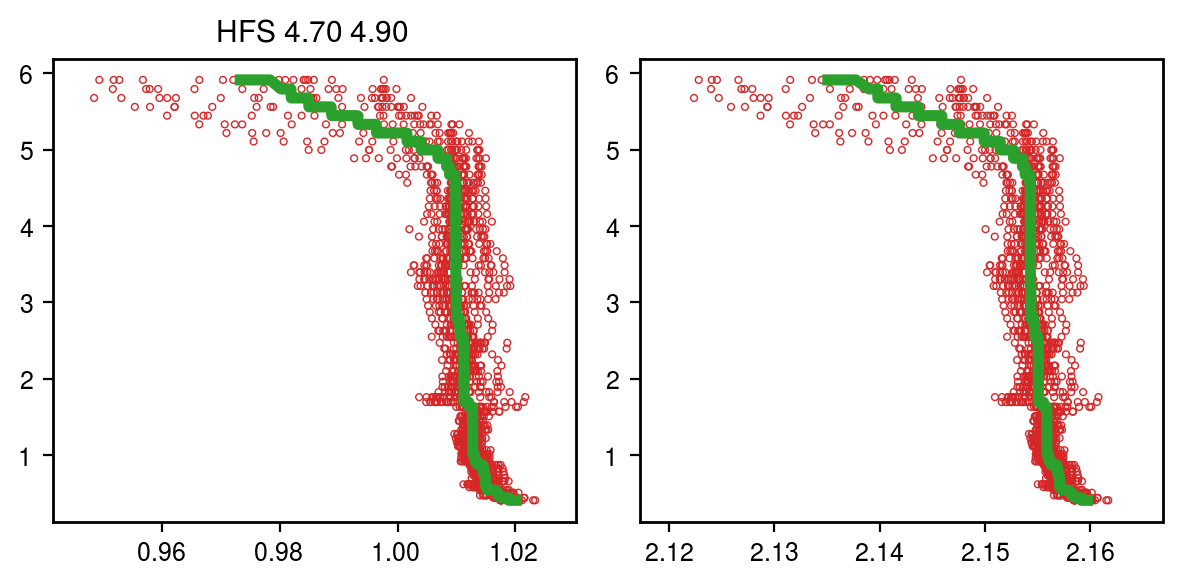

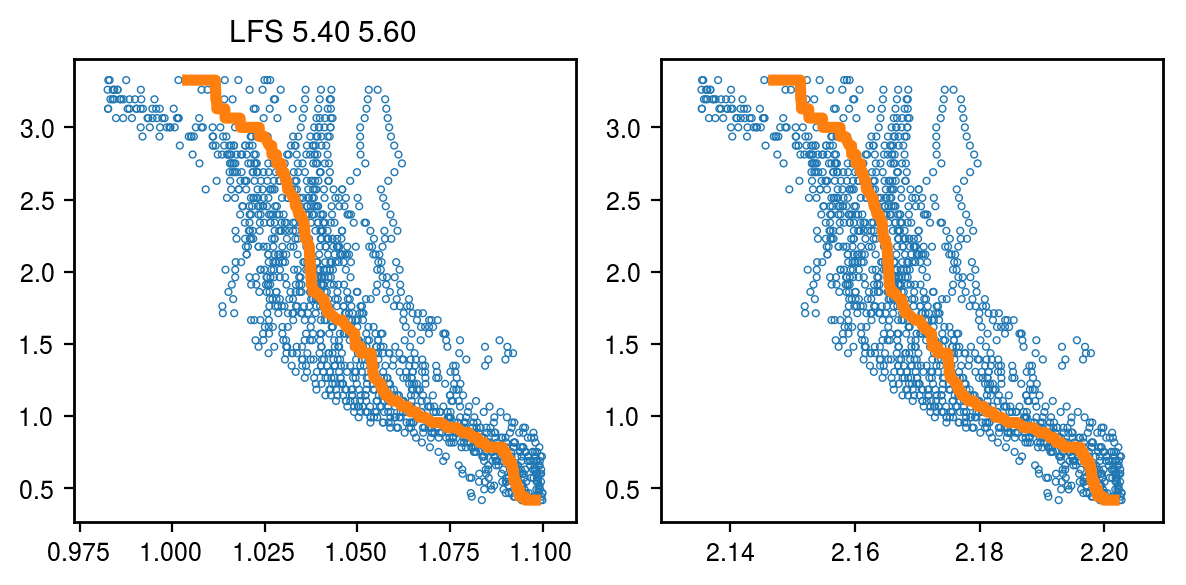

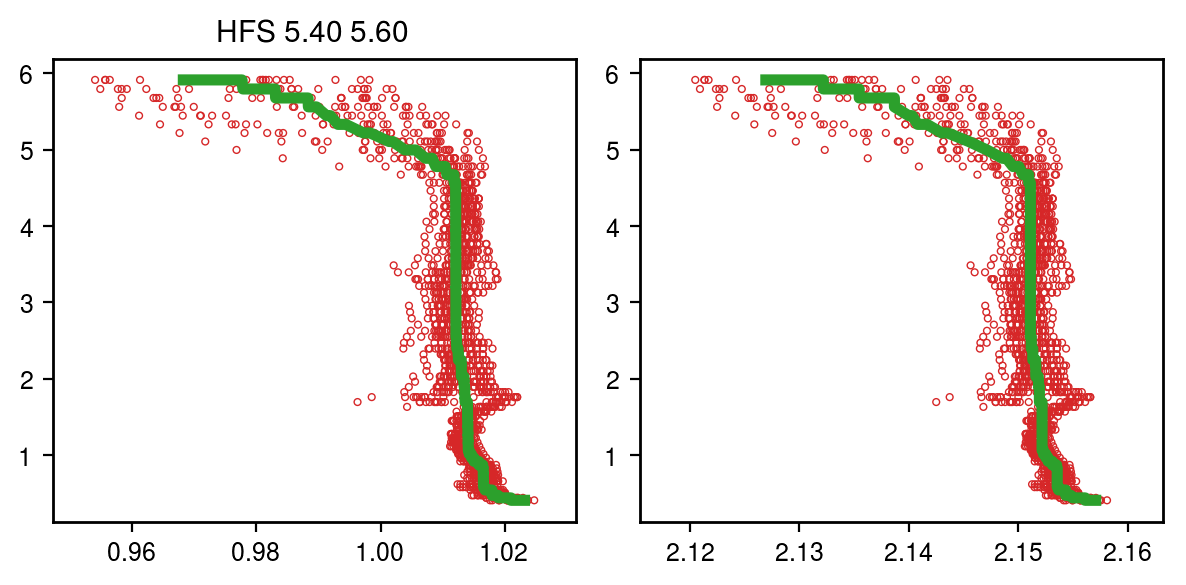

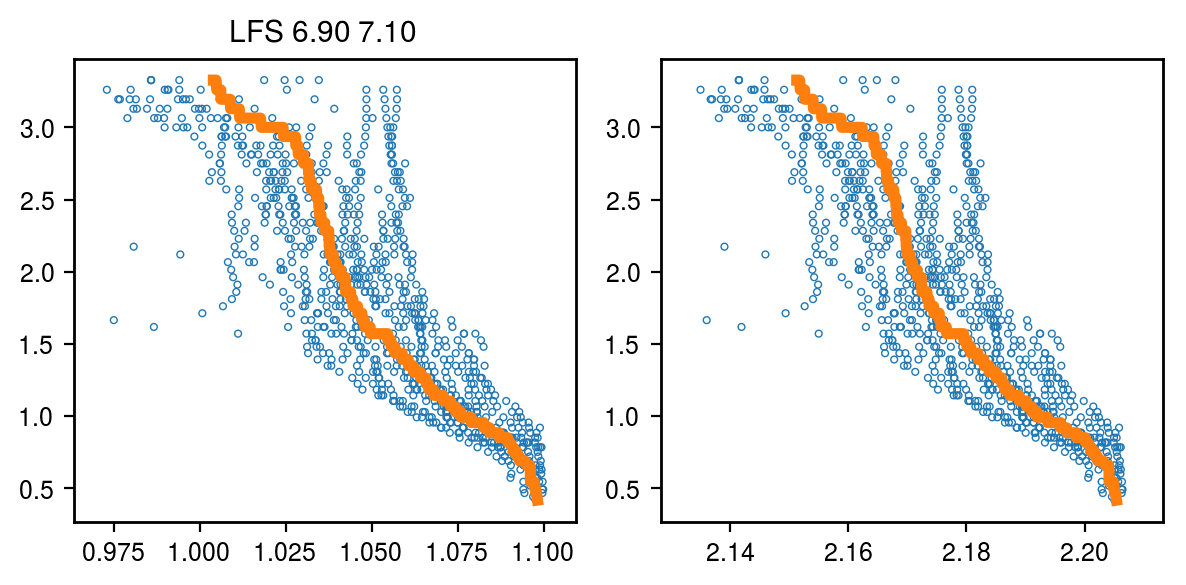

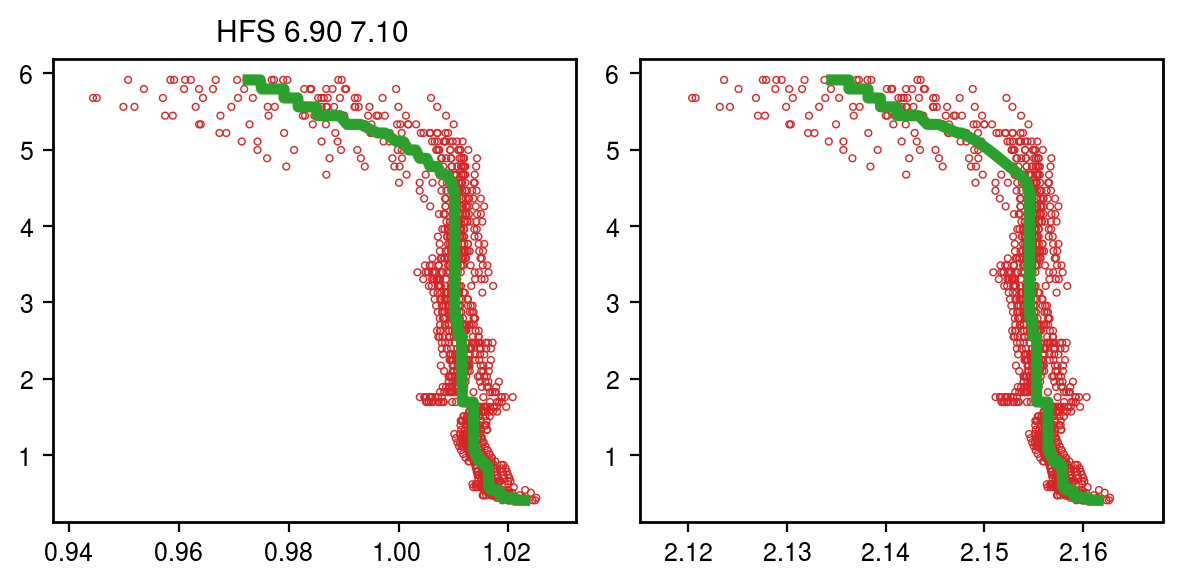

In [54]:
dpi = 200

rholtot = []
rltot = []
nltot = []
rhohtot = []
rhtot = []
nhtot = []

for i in range(5):
    #LFS
    lrad = pall[i].rad[pall[i].indi[2]:pall[i].indf[2]]
    lrho = pall[i].rhos[pall[i].indi[2]:pall[i].indf[2]]
    ldens = pall[i].dens[pall[i].indi[2]:pall[i].indf[2]]*1e-19
    lms = (lrad>cutsl_low[i])&(lrad<cutsl_hi[i])

    fig, ax = plt.subplots(figsize=(6,3), ncols=2, nrows=1, dpi=dpi)
    ax[0].set_title('LFS %0.2f %0.2f'%(pall[i].t1,pall[i].t2))
    ax[0].scatter(lrho[lms], ldens[lms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C0", marker='o')
    ax[1].scatter(lrad[lms], ldens[lms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C0", marker='o')

    dol1 = isotonic_regression(lrho[lms], strict=True)
    drl1 = isotonic_regression(lrad[lms], strict=True)
    dnl1 = ldens[lms]

    rhol1 = dol1[l_indstart[i]:l_indend[i]]
    rl1 = drl1[l_indstart[i]:l_indend[i]]
    nl1 = dnl1[l_indstart[i]:l_indend[i]]

    ax[0].plot(rhol1, nl1, c='C1', lw=4)
    ax[1].plot(rl1, nl1, c='C1', lw=4)
    
    rholtot.append(rhol1)
    rltot.append(rl1)
    nltot.append(nl1)
    
    plt.tight_layout()
    plt.show()
    
    #HFS
    hrad = pall[i].rad[pall[i].indi[3]:pall[i].indf[3]]
    hrho = pall[i].rhos[pall[i].indi[3]:pall[i].indf[3]]
    hdens = pall[i].dens[pall[i].indi[3]:pall[i].indf[3]]*1e-19
    hms = (hrad>cutsh_low[i])&(hrad<cutsh_hi[i])

    fig, ax = plt.subplots(figsize=(6,3), ncols=2, nrows=1, dpi=dpi)
    ax[0].set_title('HFS %0.2f %0.2f'%(pall[i].t1,pall[i].t2))
    ax[0].scatter(hrho[hms]+refhfsshift[i], hdens[hms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C3", marker='o')
    ax[1].scatter(hrad[hms]+refhfsshift[i], hdens[hms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C3", marker='o')

    doh1 = isotonic_regression(hrho[hms], strict=True)
    drh1 = isotonic_regression(hrad[hms], strict=False)
    dnh1 = hdens[hms]

    rh1 = drh1[h_indstart[i]:h_indend[i]]
    rhoh1 = doh1[h_indstart[i]:h_indend[i]]
    nh1 = dnh1[h_indstart[i]:h_indend[i]]

    ax[0].plot(rhoh1, nh1, c='C2', lw=4)
    ax[1].plot(rh1, nh1, c='C2', lw=4)
    
    rhohtot.append(rhoh1)
    rhtot.append(rh1)
    nhtot.append(nh1)

    plt.tight_layout()
    plt.show()

# All in one plot

In [55]:
labelstr1=r"$\mathrm{t=2.25s}$""\n"r"$\mathrm{P_{aux}=9.5MW}$""\n"r"$\mathrm{D=1.0e22e/s}$"
labelstr2=r"$\mathrm{t=3.80s}$""\n"r"$\mathrm{P_{aux}=9.5MW}$""\n"r"$\mathrm{D=4.0e22e/s}$"
labelstr3=r"$\mathrm{t=4.80s}$""\n"r"$\mathrm{P_{aux}=15MW}$""\n"r"$\mathrm{D=4.0e22e/s}$"
labelstr4=r"$\mathrm{t=5.50s}$""\n"r"$\mathrm{P_{aux}=15MW}$""\n"r"$\mathrm{D=7.0e22e/s}$"
labelstr5=r"$\mathrm{t=7.00s}$""\n"r"$\mathrm{P_{aux}=12.7MW}$""\n"r"$\mathrm{D=6.5e22e/s}$"
lblstr = [labelstr1,labelstr2,labelstr3,labelstr4,labelstr5]

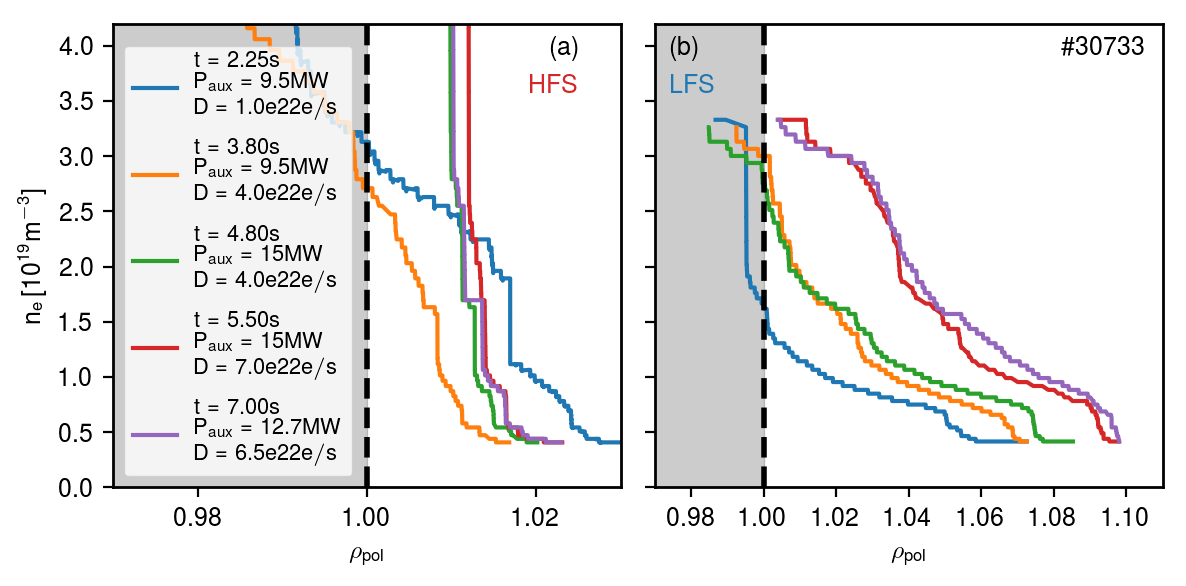

In [58]:
fig, ax = plt.subplots(figsize=(6,3),nrows=1,ncols=2,dpi=200, sharey=True)

alphaval = 0.2

ax[0].text(0.92,0.93,'(a)', ha='right', color='k', transform=ax[0].transAxes)
ax[0].text(0.92,0.85,'HFS', ha='right', color='C3', transform=ax[0].transAxes)
ax[1].text(0.03,0.93,'(b)', ha='left', color='k', transform=ax[1].transAxes)
ax[1].text(0.03,0.85,'LFS', ha='left', color='C0', transform=ax[1].transAxes)
ax[1].text(0.8,0.93,'\#30733', ha='left', color='k', transform=ax[1].transAxes)

ymax = 4.2
ax[1].set_xlim([0.97, 1.11])
ax[1].set_xticks([0.98,1.0,1.02,1.04,1.06,1.08,1.1])
ax[0].set_ylim(0, ymax)
ax[0].set_xlim([0.97, 1.03])

for i in range(5):
    ax[0].plot(isotonic_regression(rhohtot[i], strict=True), nhtot[i], label=lblstr[i])
    ax[1].plot(isotonic_regression(rholtot[i], strict=True), nltot[i])
    
ax[0].set_ylabel(r'$\mathrm{n_{e}\,[10^{19}m^{-3}]}$')
ax[0].set_xlabel(r'$\mathrm{\rho_{pol}}$')
ax[1].set_xlabel(r'$\mathrm{\rho_{pol}}$')

ax[1].axvline(1.0, color='black', lw=2, ls='--')
ax[1].axvspan(0., 1., color='black', alpha=alphaval)
ax[0].axvline(1.0, color='black', lw=2, ls='--')
ax[0].axvspan(0., 1., color='black', alpha=alphaval)

ax[0].legend(frameon=True, fontsize=7.9, loc='lower left', labelspacing=0.9)
plt.tight_layout()
plt.savefig('./Revised/Figure5.png', dpi=300)
plt.show()

# LFS SOL plot

In [10]:
from scipy.interpolate import interp1d
import matplotlib.patches as mpatches
import pandas as pd

ndf = pd.DataFrame.from_csv('./SupportFiles/Pressure_Fuel_30733.csv')

mkr_dict = {'s': 's', '*': '*'}
markr = ['o', 'o', '*', '*', '*']
colors = ['#17becf', '#bcbd22','#7f7f7f','#e377c2','#8c564b']

/home/guimas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """


##### New dataframe

In [58]:
ndf.head()

Fuel       0.9      1.00      1.02      1.04      1.06      1.08  \
0  1.742029e+22  0.960000  0.980000  1.000000  1.020000  1.040000  1.060000   
1  3.988460e+22  1.022619  1.339352  1.212289  1.098264  1.134769  0.978162   
2  3.653135e+22  1.024978  1.449709  1.351923  1.242926  1.332160  1.575295   
3  6.767685e+22  1.135431  2.243264  2.414598  2.186370  1.982248  3.119091   
4  6.512725e+22  1.108094  2.168084  2.315115  2.197281  2.056510  3.233999   

  symbol  
0      s  
1      s  
2      s  
3      *  
4      *

##### SOL plot

In [79]:
rholsol = np.array([1.0, 1.02, 1.04, 1.06])

rhol = []

for i in range(5):
    pint = interp1d(rholtot[i], nltot[i], fill_value='extrapolate')
    rhol.append(pint(rholsol))
    
rhol = np.array(rhol).T

In [82]:
ndf['1.00'][1:5] 

1    1.339352
2    1.449709
3    2.243264
4    2.168084
Name: 1.00, dtype: float64

In [80]:
rhol[0]

array([1.66407084, 3.00076079, 2.7508111 , 3.2615788 , 3.2615788 ])

In [47]:

    
    
for i, ind in zip(ndf.columns[1:6], range(len(ndf.columns[1:6]))):
    for j in range(len(ndf['Fuel'])):
        plt.scatter(ndf['Fuel'][j]*1e-22, rhol[i][j]*100-100, s=60, marker=markr[j], c=colors[ind])
    
plt.show()

TypeError: list indices must be integers, not str

In [64]:
rhol

[array([1.66407084, 0.95395398, 0.75019008, 0.41601768]),
 array([3.00076079, 1.61686599, 0.91829532, 0.71860683]),
 array([2.7508111 , 1.61686599, 1.06500494, 0.82005841]),
 array([3.2615788 , 3.00076079, 1.82668827, 1.10338104]),
 array([3.2615788 , 3.00076079, 2.01352501, 1.39102697])]

In [78]:
np.array(rhol).T[0]

array([1.66407084, 3.00076079, 2.7508111 , 3.2615788 , 3.2615788 ])

#### Average REF LFS profile P1 [2.15, 2.35]

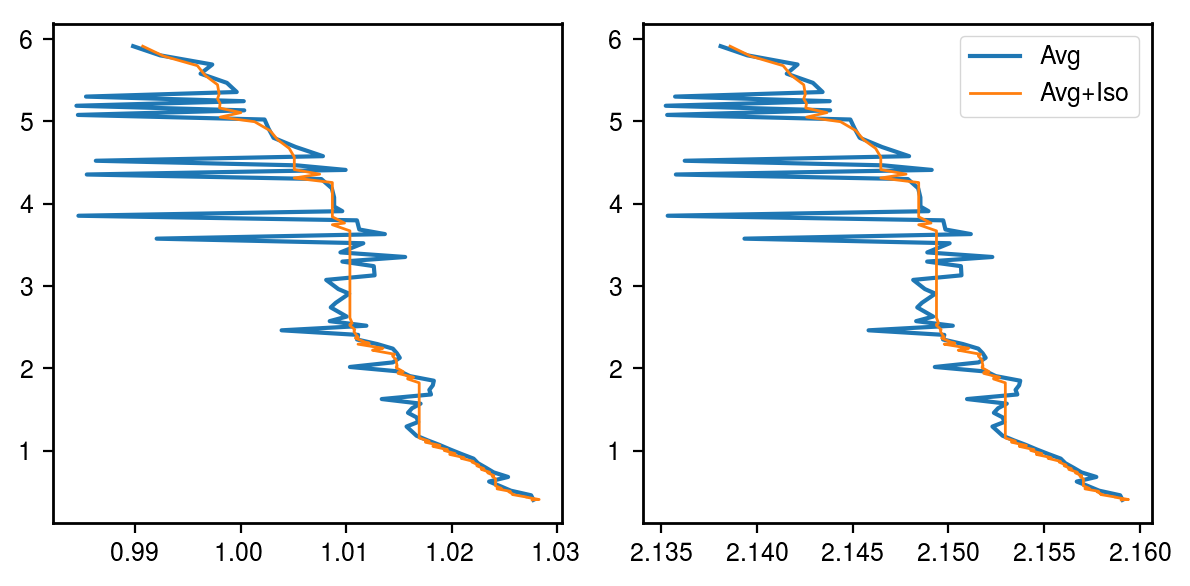

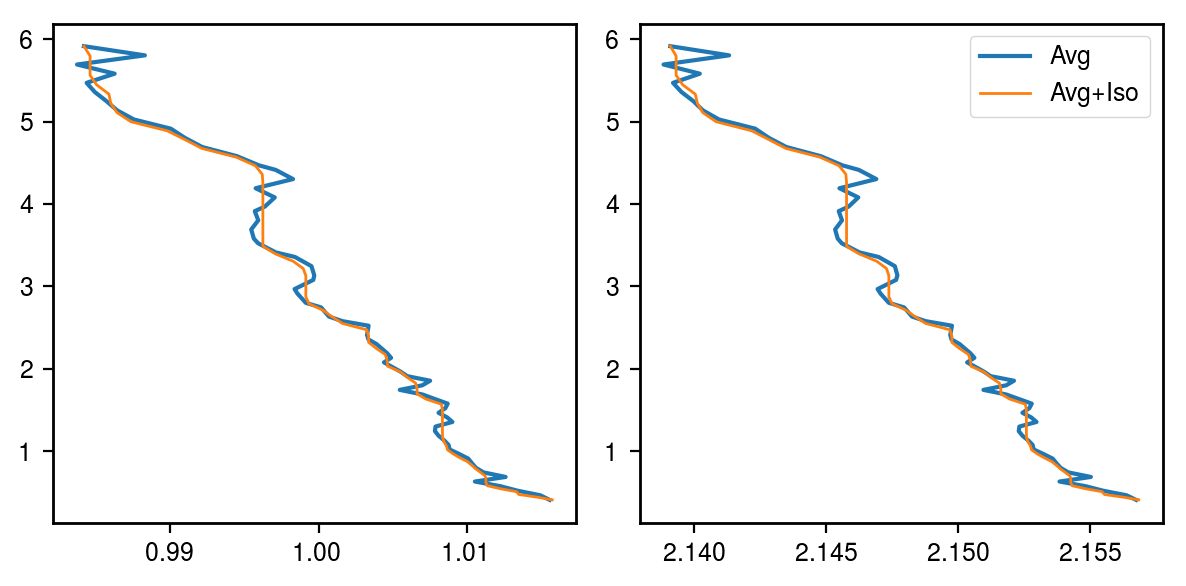

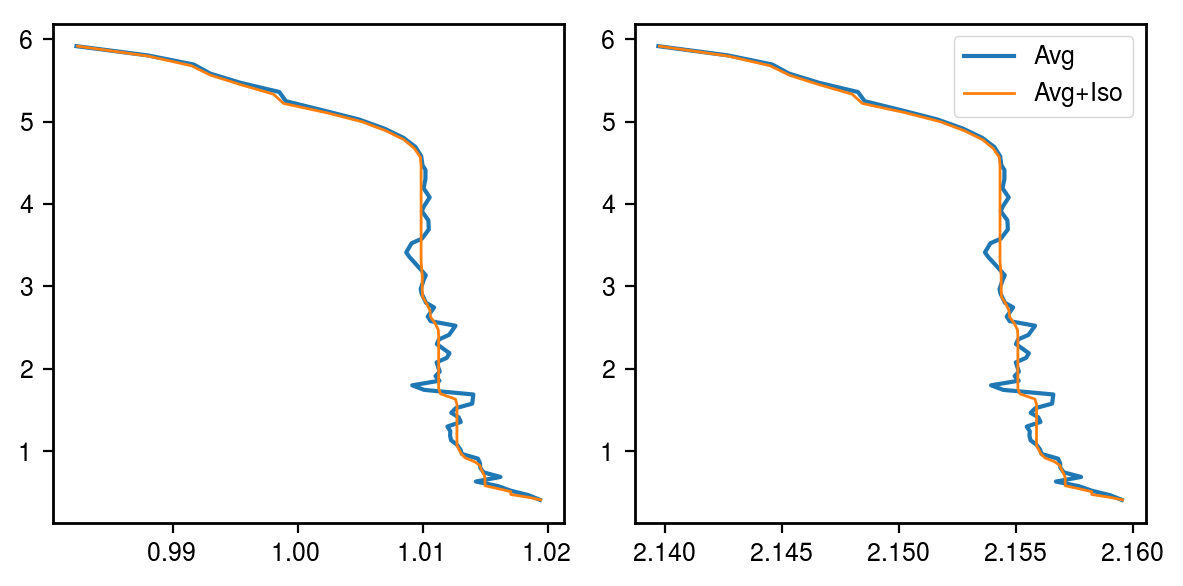

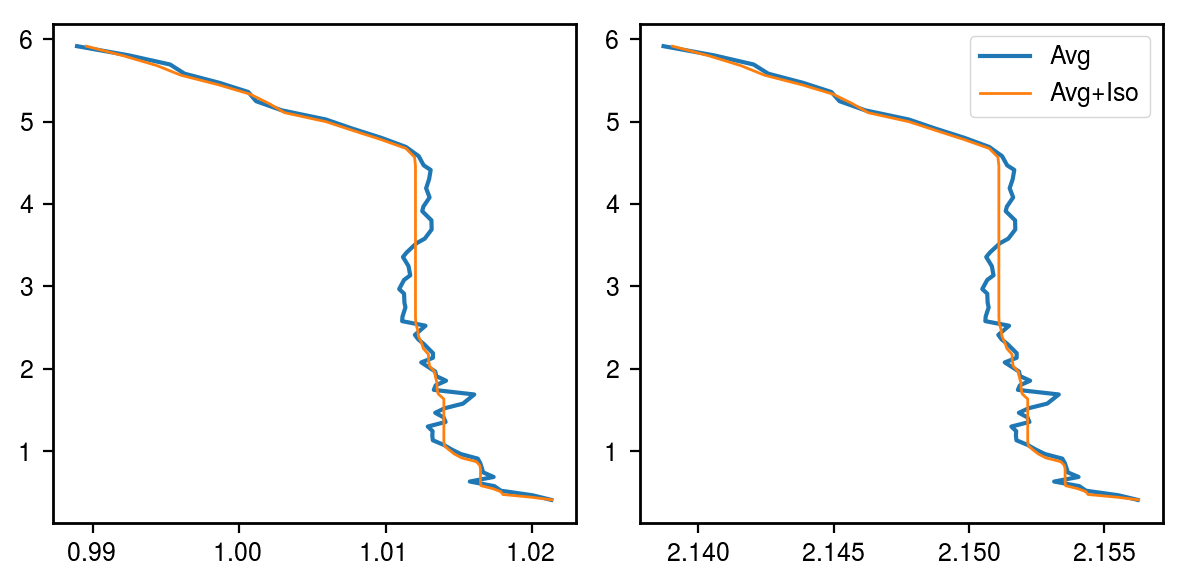

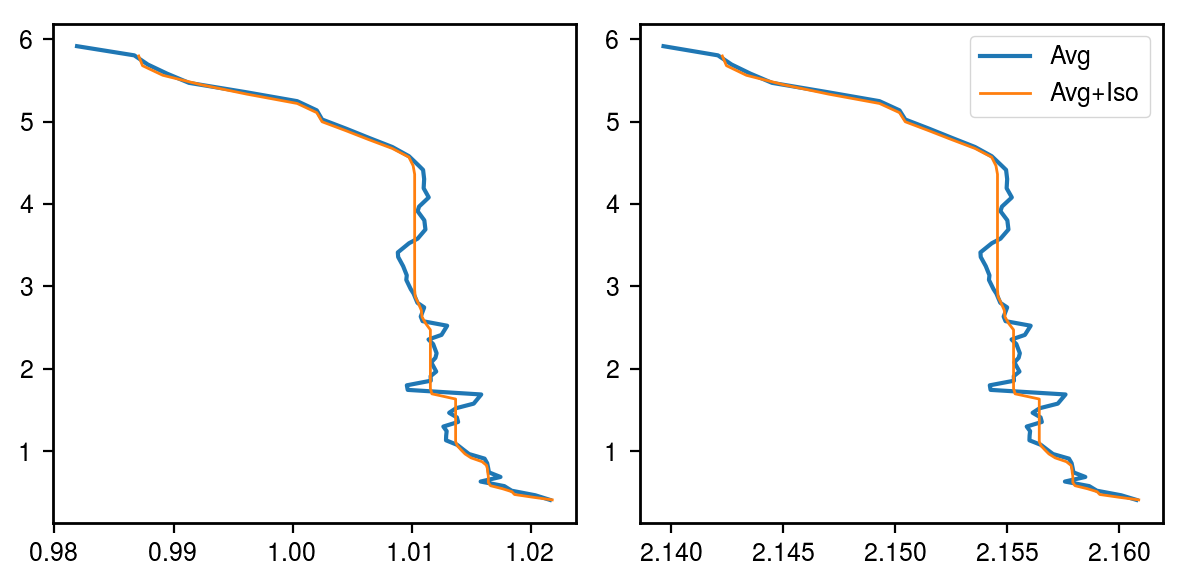

In [76]:
#Indexes
l_rhoindstart = [0,0,0,0,0]
l_rhoindend = [-3,-7,-7,-4,-3]
h_rhoindstart = [0,0,0,0,0]
h_rhoindend = [-1,-1,-1,-4,-10]

for i in range(5):
    for diagind in range():
        lrad = pall[i].rad[pall[i].indi[diagind]:pall[i].indf[diagind]]
        lrho = pall[i].rhos[pall[i].indi[diagind]:pall[i].indf[diagind]]
        ldens = pall[i].dens[pall[i].indi[diagind]:pall[i].indf[diagind]]*1e-19
        lms = (lrad>cutsl_low[i])&(lrad<cutsl_hi[i])

        fig, ax = plt.subplots(figsize=(6,3), ncols=2, nrows=1, dpi=200)
        #ax[0].scatter(lrho[lms], ldens[lms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C0", marker='o')
        #ax[1].scatter(lrad[lms], ldens[lms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C0", marker='o')

        a,b = binMeanDataYY(lrho[lms], ldens[lms])
        ax[0].plot(a,b, label='Avg')
        a,b = binMeanDataYY(lrad[lms], ldens[lms])
        ax[1].plot(a,b, label='Avg')

        dol1 = isotonic_regression(lrho[lms], strict=True)
        drl1 = isotonic_regression(lrad[lms], strict=True)
        dnl1 = ldens[lms]

        if diagind == 2:
            indstart = l_rhoindstart[i]
            indend = l_rhoindend[i]
        else:
            indstart = h_rhoindstart[i]
            indend = h_rhoindend[i]
            
        rhol1 = dol1[indstart:indend]
        rl1 = drl1[indstart:indend]
        nl1 = dnl1[indstart:indend]

        snl1 = np.asarray(list(set(nl1)))
        sortsnl1 = snl1[snl1.argsort()]

        indvg = []
        navg = []
        ravg = []
        havg = []
        for qua in range(len(sortsnl1)):
            indvg.append(nl1==sortsnl1[qua])
            havg.append(np.mean(rhol1[indvg[qua]]))
            ravg.append(np.mean(rl1[indvg[qua]]))

        ax[0].plot(havg, sortsnl1, c='C1', lw=1, label='Avg+Iso')
        ax[1].plot(ravg, sortsnl1, c='C1', lw=1, label='Avg+Iso')

        ax[1].legend()
        #ax[0].plot(rhol1, nl1, c='C1', lw=1)
        #ax[1].plot(rl1, nl1, c='C1', lw=1)
        plt.tight_layout()
        np.savetxt('./SupportFiles/rhoprof_'+str(i)+'_'+str(diagind)+'.30733', np.c_[havg, sortsnl1])
        plt.show()

In [121]:
bbr, bby = binMeanDataYY(rl1, nl1)
binpts = 100
nbdens = np.linspace(min(nl1),max(nl1), binpts)
bins = np.digitize(nl1, nbdens, right=True)
binrho = []
binrad = []
bindens = []
for i in range(binpts):
    dum = bins==i
    dum2 = nl1[dum]
    if len(dum2)==0:
        gg=0
    else:
        binrho.append(np.mean(rl1[dum]))
        binrad.append(np.mean(rhol1[dum]))
        bindens.append(nbdens[i])

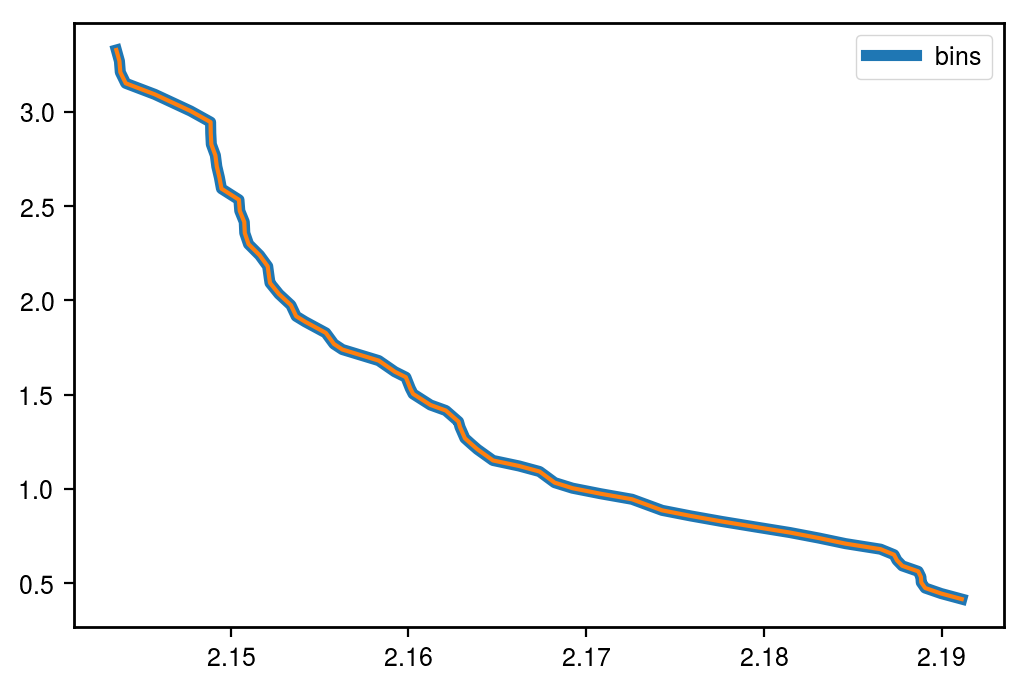

In [122]:
plt.figure(dpi=200)
plt.plot(binrho, bindens, label='bins', lw=4)
plt.plot(bbr, bby)
#plt.plot(rl1,nl1)
#plt.plot(isotonic_regression(ravg, strict=False), sortsnl1, label='regression')
plt.legend()
plt.show()

In [88]:
npts = 100
arl = []
rin1 = np.linspace(min(rhol1), max(rhol1), npts)

for i in range(npts-1):
    ind = (rin1[i])

#### Average REF HFS profile P1 [2.15, 2.35]

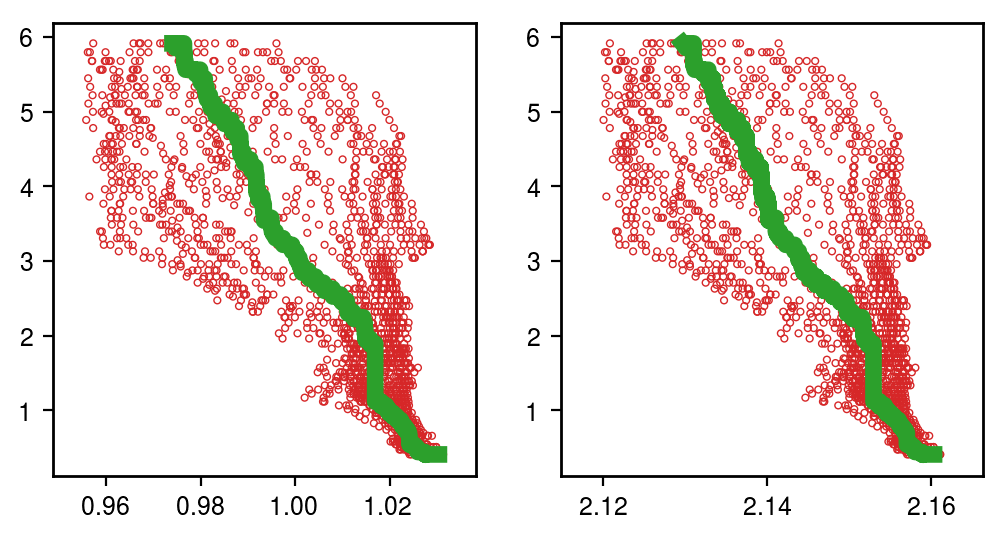

In [10]:
i=0

hrad = pall[i].rad[pall[i].indi[3]:pall[i].indf[3]]
hrho = pall[i].rhos[pall[i].indi[3]:pall[i].indf[3]]
hdens = pall[i].dens[pall[i].indi[3]:pall[i].indf[3]]*1e-19
hms = (hrad>cutsh_low[i])&(hrad<cutsh_hi[i])

fig, ax = plt.subplots(figsize=(6,3), ncols=2, nrows=1, dpi=200)
ax[0].scatter(hrho[hms]+refhfsshift[i], hdens[hms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C3", marker='o')
ax[1].scatter(hrad[hms]+refhfsshift[i], hdens[hms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C3", marker='o')

doh1 = isotonic_regression(hrho[hms], strict=True)
drh1 = isotonic_regression(hrad[hms], strict=False)
dnh1 = hdens[hms]

indstart = 0
indend = -1
rh1 = drh1[indstart:indend]
rhoh1 = doh1[indstart:indend]
nh1 = dnh1[indstart:indend]

ax[0].plot(rhoh1, nh1, c='C2', lw=6)
ax[1].plot(rh1, nh1, c='C2', lw=6)
plt.show()

#### Average REF LFS profile P2 [3.7, 3.9]

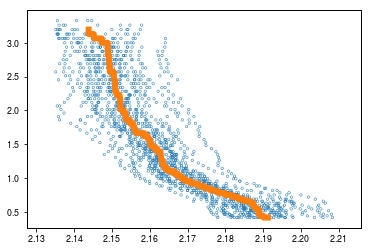

In [11]:
i=1
lrad = pall[i].rad[pall[i].indi[2]:pall[i].indf[2]]
ldens = pall[i].dens[pall[i].indi[2]:pall[i].indf[2]]*1e-19
lms = (lrad>cutsl_low[i])&(lrad<cutsl_hi[i])
plt.scatter(lrad[lms]+reflfsshift[i], ldens[lms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C0", marker='o')

drl2 = isotonic_regression(lrad[lms])
dnl2 = ldens[lms]

indstart = 3
indend = -13
rl2 = drl2[indstart:indend]
nl2 = dnl2[indstart:indend]

plt.plot(rl2, nl2, c='C1', lw=6)
plt.show()

#### Average REF HFS profile P2

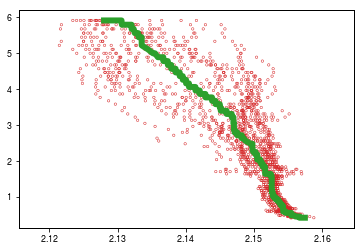

In [12]:
i=1
cutsh_hi = [3.0, 3.0, 3.0]

hrad = pall[i].rad[pall[i].indi[3]:pall[i].indf[3]]
hdens = pall[i].dens[pall[i].indi[3]:pall[i].indf[3]]*1e-19
hms = (hrad>cutsh_low[i])&(hrad<cutsh_hi[i])
plt.scatter(hrad[hms]+refhfsshift[i], hdens[hms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C3", marker='o')

rh2 = isotonic_regression(hrad[hms])
nh2 = hdens[hms]

plt.plot(rh2, nh2, c='C2', lw=6)
plt.show()

#### Average REF LFS profile P3

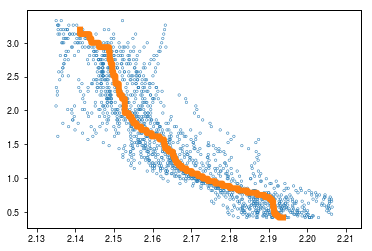

In [13]:
i=2
lrad = pall[i].rad[pall[i].indi[2]:pall[i].indf[2]]
ldens = pall[i].dens[pall[i].indi[2]:pall[i].indf[2]]*1e-19
lms = (lrad>cutsl_low[i])&(lrad<cutsl_hi[i])
plt.scatter(lrad[lms]+reflfsshift[i], ldens[lms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C0", marker='o')

drl3 = isotonic_regression(lrad[lms])
dnl3 = ldens[lms]

indstart = 5
indend = -12
rl3 = drl3[indstart:indend]
nl3 = dnl3[indstart:indend]

plt.plot(rl3, nl3, c='C1', lw=6)
plt.show()

#### Average REF HFS profile P3

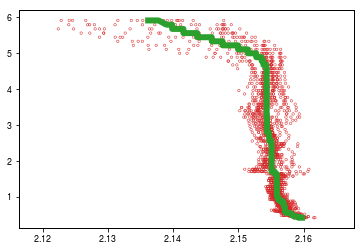

In [14]:
i=2
cutsh_hi = [3.0, 3.0, 3.0]

hrad = pall[i].rad[pall[i].indi[3]:pall[i].indf[3]]
hdens = pall[i].dens[pall[i].indi[3]:pall[i].indf[3]]*1e-19
hms = (hrad>cutsh_low[i])&(hrad<cutsh_hi[i])
plt.scatter(hrad[hms]+refhfsshift[i], hdens[hms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C3", marker='o')

drh3 = isotonic_regression(hrad[hms])
dnh3 = hdens[hms]

indstart = 0
indend = -15
rh3 = drh3[indstart:indend]
nh3 = dnh3[indstart:indend]

plt.plot(rh3, nh3, c='C2', lw=6)
plt.show()

#### Average REF LFS profile P4

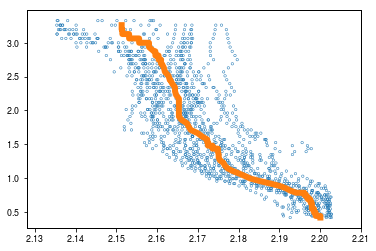

In [15]:
i=3
lrad = pall[i].rad[pall[i].indi[2]:pall[i].indf[2]]
ldens = pall[i].dens[pall[i].indi[2]:pall[i].indf[2]]*1e-19
lms = (lrad>cutsl_low[i])&(lrad<cutsl_hi[i])
plt.scatter(lrad[lms]+reflfsshift[i], ldens[lms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C0", marker='o')

drl4 = isotonic_regression(lrad[lms])
dnl4 = ldens[lms]

indstart = 5
indend = -12
rl4 = drl4[indstart:indend]
nl4 = dnl4[indstart:indend]

plt.plot(rl4, nl4, c='C1', lw=6)
plt.show()

#### Average REF HFS profile P4

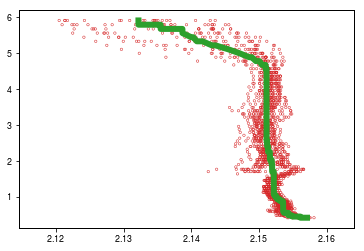

In [16]:
i=3
cutsh_hi = [3.0, 3.0, 3.0, 3.0]

hrad = pall[i].rad[pall[i].indi[3]:pall[i].indf[3]]
hdens = pall[i].dens[pall[i].indi[3]:pall[i].indf[3]]*1e-19
hms = (hrad>cutsh_low[i])&(hrad<cutsh_hi[i])
plt.scatter(hrad[hms]+refhfsshift[i], hdens[hms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C3", marker='o')

drh4 = isotonic_regression(hrad[hms])
dnh4 = hdens[hms]

indstart = 0
indend = -15
rh4 = drh4[indstart:indend]
nh4 = dnh4[indstart:indend]

plt.plot(rh4, nh4, c='C2', lw=6)
plt.show()

#### Average REF LFS profile P5

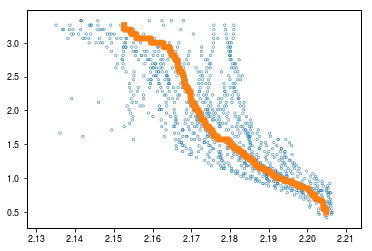

In [17]:
i=4
lrad = pall[i].rad[pall[i].indi[2]:pall[i].indf[2]]
ldens = pall[i].dens[pall[i].indi[2]:pall[i].indf[2]]*1e-19
lms = (lrad>cutsl_low[i])&(lrad<cutsl_hi[i])
plt.scatter(lrad[lms]+reflfsshift[i], ldens[lms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C0", marker='o')

drl5 = isotonic_regression(lrad[lms])
dnl5 = ldens[lms]

indstart = 5
indend = -12
rl5 = drl5[indstart:indend]
nl5 = dnl5[indstart:indend]

plt.plot(rl5, nl5, c='C1', lw=6)
plt.show()

#### Average REF HFS profile P5

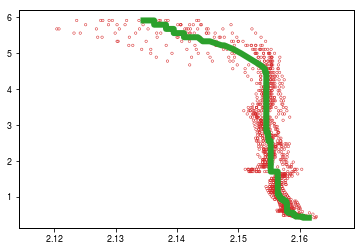

In [18]:
i=4
cutsh_hi = [3.0, 3.0, 3.0, 3.0, 3.0]

hrad = pall[i].rad[pall[i].indi[3]:pall[i].indf[3]]
hdens = pall[i].dens[pall[i].indi[3]:pall[i].indf[3]]*1e-19
hms = (hrad>cutsh_low[i])&(hrad<cutsh_hi[i])
plt.scatter(hrad[hms]+refhfsshift[i], hdens[hms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C3", marker='o')

drh5 = isotonic_regression(hrad[hms])
dnh5 = hdens[hms]

indstart = 0
indend = -10
rh5 = drh5[indstart:indend]
nh5 = dnh5[indstart:indend]

plt.plot(rh5, nh5, c='C2', lw=6)
plt.show()

#### Concatenate data

In [19]:
ddnl = [nl1, nl2, nl3, nl4, nl5]
ddrl = [rl1, rl2, rl3, rl4, rl5]
ddnh = [nh1, nh2, nh3, nh4, nh5]
ddrh = [rh1, rh2, rh3, rh4, rh5]

#### Plots

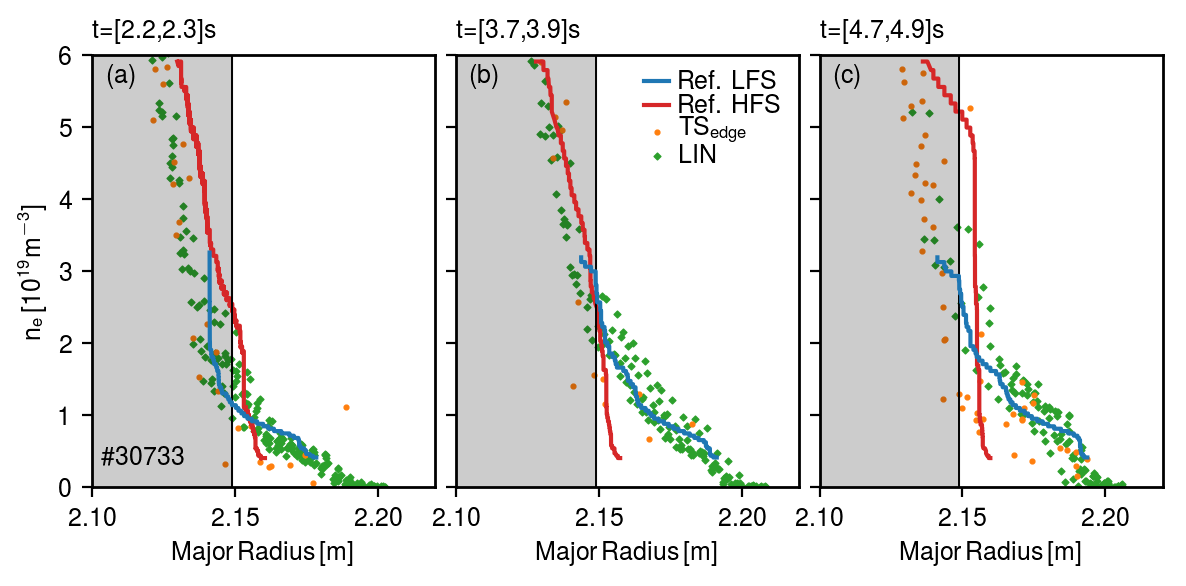

In [20]:
dotsize = 3
dotsizeref = 4
zorder = np.array([1,0,3,2])
labels = [r'$\mathrm{TS_{edge}}$', 'LIN', 'Ref. LFS', 'Ref. HFS']
framebox = [False, True]

textlabels= ['(a)','(b)','(c)']
fpgshift = [0.0,0.0,0.0]

#HFS shifts
### Shifts adjusted for the first time first time

### Shifts adjusted so (b) matches high gradie

#LFS shifts
#Original shifts compensated
#reflfsshift = np.array([p1.neRshift[5],p1.neRshift[5]])
reflfsshift = np.array([0.0,0.0,0.0])

fig, ax = plt.subplots(figsize=(6,3),ncols=3,nrows=1,sharey=True,dpi=200)

for i in range(len(textlabels)):

    #TS edge
    ax[i].scatter(pall[i].rad[pall[i].indi[0]:pall[i].indf[0]], pall[i].dens[pall[i].indi[0]:pall[i].indf[0]]*1e-19,
                  s=dotsize, zorder=zorder[0], label=labels[0],facecolors="C1", marker='o')
    #LIN
    ax[i].scatter(pall[i].rad[pall[i].indi[1]:pall[i].indf[1]], pall[i].dens[pall[i].indi[1]:pall[i].indf[1]]*1e-19,
                  s=dotsize, zorder=zorder[1], label=labels[1],facecolors='C2', marker='D')
    #Plot LFS ref
    ax[i].plot(ddrl[i], ddnl[i], zorder=zorder[2], label=labels[2], color="C0")
    #Clean up HFS ref
    ax[i].plot(ddrh[i], ddnh[i], zorder=zorder[3], label=labels[3], color="C3")
    
    #Separatrixes
    ax[i].axvline(pall[0].fpgavg+fpgshift[i], color='k', lw=0.7)
    ax[i].axvspan(2.1, pall[0].fpgavg+fpgshift[i], color='k', alpha=0.2)

    ax[i].set_xlabel(r'$\mathrm{Major\,Radius\,[m]}$')
    
    ax[i].set_ylim(0,6)
    ax[i].set_xlim(2.10,2.22)

    ax[i].set_title('t=[%0.1f,%0.1f]s'%(pall[i].t1,pall[i].t2), loc='left', fontsize=9)

    ax[i].set_xticks([2.10,2.15,2.20])
    ax[i].text(2.105,5.6,textlabels[i], color='k')

    #ax[i].legend(loc='upper right',borderpad=0.1,frameon=framebox[i],handletextpad=-0.3,labelspacing=0.1)

ax[1].legend(loc='upper right',borderpad=0.1,frameon=False,handletextpad=0.4,labelspacing=0.0,handlelength=1)
ax[0].set_ylabel(r'$\mathrm{n_e\,[10^{19}m^{-3}]}$')
ax[0].text(2.103, 0.3,'\#'+str(shotnr),color='k')
#
plt.tight_layout()
plt.subplots_adjust(wspace=0.06)
plt.savefig('Profiles/All_32233.png',dpi=300)
plt.show()

## LFS SOL plot